In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv('data/train.csv') 
tst = pd.read_csv('data/test.csv')

In [32]:
df = df.assign(value = lambda x: x.bid1vol - x.ask1vol)
df = df.assign(sm = lambda x: (x.bid1vol+ x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) - (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))
df = df.assign(sm4 = lambda x: (x.bid1vol+ x.bid2vol+x.bid3vol+x.bid4vol) - (x.ask1vol+x.ask2vol+x.ask3vol+x.ask4vol))
df = df.assign(sm3 = lambda x: (x.bid1vol+ x.bid2vol+x.bid3vol) - (x.ask1vol+x.ask2vol+x.ask3vol))
df = df.assign(sm2 = lambda x: (x.bid1vol+ x.bid2vol) - (x.ask1vol+x.ask2vol))


df.rename(columns={'opened_position_qty ': "opened_position_qty"})




# indicator - difference between the price of most recent order and average of best bid and best ask (mid)
df = df.assign(diff_price = lambda x: ((x.last_price) - (x.mid)))
# indicator - difference between best bid price and best ask price
df = df.assign(diff_best_bid_ask = lambda x: - (x.bid1) + (x.ask1))

tst = tst.assign(value = lambda x: x.bid1vol - x.ask1vol)
tst = tst.assign(sm = lambda x: (x.bid2vol+x.bid3vol+x.bid4vol+x.bid5vol) - (x.ask2vol+x.ask3vol+x.ask4vol+x.ask5vol))
# indicator - difference between the price of most recent order and average of best bid and best ask (mid)
tst = tst.assign(diff_price = lambda x: ((x.last_price) - (x.mid)))
# indicator - difference between best bid price and best ask price
tst = tst.assign(diff_best_bid_ask = lambda x: - (x.bid1) + (x.ask1))


df.rename(columns={'opened_position_qty': 'opened_position_qty'}, inplace = True)
tst.rename(columns={'opened_position_qty': 'opened_position_qty'}, inplace = True)
tst = tst.assign(sm3 = lambda x: (x.bid1vol+ x.bid2vol+x.bid3vol) - (x.ask1vol+x.ask2vol+x.ask3vol))
tst = tst.assign(sm2 = lambda x: (x.bid1vol+ x.bid2vol) - (x.ask1vol+x.ask2vol))





nan_values = {'opened_position_qty': (df['transacted_qty'] + df['d_open_interest']) / 2 , 
              'closed_position_qty': (df['transacted_qty'] - df['d_open_interest']) / 2}

nan_values_test = {'opened_position_qty': (tst['transacted_qty'] + tst['d_open_interest']) / 2 , 
              'closed_position_qty': (tst['transacted_qty'] - tst['d_open_interest']) / 2}

df = df.fillna(value=nan_values)
tst = tst.fillna(value=nan_values_test)



df = df.assign(openclosed = lambda x: x.opened_position_qty - x.closed_position_qty)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592380 entries, 0 to 592379
Data columns (total 40 columns):
id                     592380 non-null int64
last_price             592380 non-null float64
mid                    592380 non-null float64
opened_position_qty    592380 non-null float64
closed_position_qty    592380 non-null float64
transacted_qty         592380 non-null float64
d_open_interest        592380 non-null int64
bid1                   592380 non-null float64
bid2                   592380 non-null float64
bid3                   592380 non-null float64
bid4                   592380 non-null float64
bid5                   592380 non-null float64
ask1                   592380 non-null float64
ask2                   592380 non-null float64
ask3                   592380 non-null float64
ask4                   592380 non-null float64
ask5                   592380 non-null float64
bid1vol                592380 non-null int64
bid2vol                592380 non-null int64
bid3

In [33]:
df = df.assign(diff_bid_ask2 = lambda x: (x.bid1+ x.bid2) - (x.ask1+x.ask2))
df = df.assign(diff_bid_ask3 = lambda x: (x.bid1+ x.bid2+x.bid3) - (x.ask1+x.ask2+x.ask3))
df = df.assign(diff_bid_ask4 = lambda x: (x.bid1+ x.bid2+x.bid3+x.bid4) - (x.ask1+x.ask2+x.ask3+x.ask4))

df = df.assign(diff_bid_ask5 = lambda x: (x.bid1+ x.bid2+x.bid3+x.bid4+x.bid5) - (x.ask1+x.ask2+x.ask3+x.ask4+x.bid5))



tst = tst.assign(diff_bid_ask2 = lambda x: (x.bid1+ x.bid2) - (x.ask1+x.ask2))


In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
model = RandomForestClassifier(max_depth=10, min_samples_split=2, 
                                  random_state=0, n_estimators=25, 
                                  max_features='sqrt', criterion='gini')




all_cols = ['last_price', 'mid', 'transacted_qty', 'd_open_interest', 
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm', 'diff_price', 'diff_best_bid_ask', 'openclosed', 
            'diff_bid_ask2', 'diff_bid_ask3', 'diff_bid_ask4', 'diff_bid_ask5',
           'sm2', 'sm3', 'sm4']
X = df[all_cols]
y = df.y
# Build a logreg and compute the feature importances
#model = LogisticRegressionCV(cv=5, random_state=0, solver='lbfgs', max_iter=300)
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

KeyboardInterrupt: 

In [ ]:
# for 12: Selected features: ['mid', 'transacted_qty', 'bid1vol', 'ask1vol', 'value', 'diff_price', 'diff_best_bid_ask', 'openclosed', 'diff_bid_ask2', 'sm2', 'sm3', 'sm4']

In [ ]:
# 10: Selected features: ['transacted_qty', 'bid1vol', 'ask1vol', 'value', 'diff_price', 'diff_best_bid_ask', 'diff_bid_ask2', 'sm2', 'sm3', 'sm4']

In [ ]:
# 7: ['transacted_qty', 'ask1vol', 'value', 'diff_price', 'diff_bid_ask2', 'sm2', 'sm3']

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

cols_opt = ['transacted_qty', 'ask1vol', 'value', 'diff_price', 'diff_bid_ask2', 'sm2', 'sm3', 'diff_best_bid_ask']
X = df[cols_opt]

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)
X = scaler.transform(X)

model = RandomForestClassifier(max_depth=10, min_samples_split=2, 
                                  random_state=0, n_estimators=25, 
                                  max_features='sqrt', criterion='gini')



results = cross_validate(model, X, y, cv=5, scoring=list(scoring.values()), 
                         return_train_score=False)
    
print('\nK-fold cross-validation results: ')
for sc in range(len(scoring)):
    print(model.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
    if list(scoring.values())[sc]=='neg_log_loss' 
    else results['test_%s' % list(scoring.values())[sc]].mean(), 
        results['test_%s' % list(scoring.values())[sc]].std()))

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



K-fold cross-validation results: 
RandomForestClassifier average accuracy: 0.662 (+/-0.003)
RandomForestClassifier average log_loss: 0.613 (+/-0.003)
RandomForestClassifier average auc: 0.661 (+/-0.007)


In [29]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

all_cols = ['transacted_qty', 'ask1vol', 'value', 'diff_price', 'diff_bid_ask2', 'sm2', 'sm3', 'diff_best_bid_ask']

X = df[all_cols]
clf_test = RandomForestClassifier(max_depth=10, min_samples_split=2, 
                                  random_state=0, n_estimators=30, 
                                  max_features='sqrt', criterion='gini')


rfecv = RFECV(estimator=clf_test, step=1, cv=10, scoring='roc_auc')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features: 8
Selected features: ['transacted_qty', 'ask1vol', 'value', 'diff_price', 'diff_bid_ask2', 'sm2', 'sm3', 'diff_best_bid_ask']


NameError: name 'plt' is not defined

In [30]:
# ok i had a typo so this didnt plot but it says 8 features is optimal

<Figure size 1000x600 with 1 Axes>

In [34]:
cols_opt = ['transacted_qty', 'ask1vol', 'value', 'diff_price', 'diff_bid_ask2', 'sm2', 'sm3', 'diff_best_bid_ask']
X = df[cols_opt]


clf_test = RandomForestClassifier(max_depth=10, min_samples_split=2, 
                                  random_state=0, n_estimators=25, 
                                  max_features='sqrt', criterion='gini')

clf_test.fit(X,y)

X_test = tst[cols_opt]
y_pred = clf_test.predict(X_test)
y_pred_proba = clf_test.predict_proba(X_test)[:, 1]
ydf = pd.DataFrame(y_pred_proba)
res = pd.concat([tst['id'], ydf], axis = 1, keys=['id', 'Predicted'])
pd.DataFrame(res).to_csv("data/proba.csv", index=None)

In [11]:
# try feature set from optimal random forest
cols_opt = ['transacted_qty', 'bid1vol', 'ask1vol', 'value', 'diff_price', 'diff_best_bid_ask', 'sm']
X = df[cols_opt]
y = df.y

In [27]:
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
# fit a model

model = MultinomialNB()


In [19]:
trainX.shape

(473904, 7)

In [20]:
model.fit(trainX, trainy)
# predict probabilities


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

cols_opt = ['transacted_qty', 'ask1vol', 'value', 'diff_price', 'diff_bid_ask2', 'sm2', 'sm3', 'diff_best_bid_ask']
X = df[cols_opt]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)
X = scaler.transform(X)

model = MultinomialNB()



results = cross_validate(model, X, y, cv=5, scoring=list(scoring.values()), 
                         return_train_score=False)
    
print('\nK-fold cross-validation results: ')
for sc in range(len(scoring)):
    print(model.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
    if list(scoring.values())[sc]=='neg_log_loss' 
    else results['test_%s' % list(scoring.values())[sc]].mean(), 
        results['test_%s' % list(scoring.values())[sc]].std()))

/Users/katerina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



K-fold cross-validation results: 
MultinomialNB average accuracy: 0.643 (+/-0.000)
MultinomialNB average log_loss: 0.651 (+/-0.000)
MultinomialNB average auc: 0.614 (+/-0.007)


Optimal number of features: 6
Selected features: ['transacted_qty', 'ask1vol', 'value', 'sm', 'diff_price', 'diff_best_bid_ask']


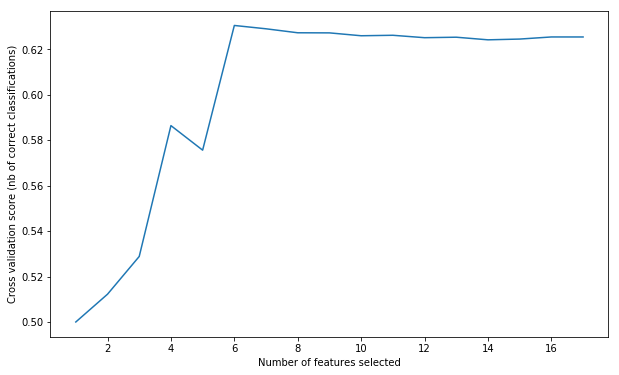

In [28]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications


# deleted 'd_open_interest', 
all_cols = ['last_price', 'mid', 'transacted_qty', 
       'bid1vol', 'bid2vol', 'bid3vol', 'bid4vol', 'bid5vol', 'ask1vol',
       'ask2vol', 'ask3vol', 'ask4vol', 'ask5vol', 'value',
       'sm', 'diff_price', 'diff_best_bid_ask']

X = df[all_cols]
clf_test = MultinomialNB()


rfecv = RFECV(estimator=clf_test, step=1, cv=10, scoring='roc_auc')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [17]:
probs = model.predict_proba(testX)
# reliability diagram
fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)
# plot perfectly calibratedç
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

ValueError: bad input shape (296190, 2)